# Time series and Forecasting

# Analysis of time series: detection of outliers

- There are methods that can be used to detect the outliers in a time series: Confidence interval method, Student test, etc.

## Confidence interval method:
- Principle:
  - Calculate the mean of the time series: 
    $$ \bar{x} = \frac{1}{n} \sum_{t=1}^{n} x_t $$
  - Calculate the standard deviation:
    $$ \sigma_x = \sqrt{\frac{1}{n-1} \sum_{t=1}^{n} (x_t - \bar{x})^2} $$
  - Calculate the confidence interval:
    $$ IC = \bar{x} \pm 1.96\sigma_x $$
  - An outlier is an observation outside the confidence interval

- NB: 1.96 is the value of the Normal distribution at 5% of risk


In [1]:
import numpy as np

# Given data
demands = np.array([28, 37, 29, 32, 49, 38, 29, 36, 21, 35, 14, 31])

# Calculate mean and standard deviation
mean_demand = np.mean(demands)
std_demand = np.std(demands, ddof=1)  # ddof=1 for sample standard deviation

# Calculate the confidence interval with a 95% confidence level
# For a normal distribution, the z-score for a 95% confidence level is 1.96
z_score = 1.96
confidence_interval = (mean_demand - z_score * std_demand, mean_demand + z_score * std_demand)

# Find outliers
outliers = demands[(demands < confidence_interval[0]) | (demands > confidence_interval[1])]

mean_demand, std_demand, confidence_interval, outliers

(31.583333333333332,
 8.805559538602802,
 (14.324436637671841, 48.84223002899482),
 array([49, 14]))

In [2]:
import pandas as pd

# Create a DataFrame for the time series data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_demands = pd.DataFrame({
    'Time': months,
    'Demand': demands
})

# Add a column to indicate whether a demand value is an outlier
df_demands['Outlier'] = (df_demands['Demand'] < confidence_interval[0]) | (df_demands['Demand'] > confidence_interval[1])

# Create a summary DataFrame for the calculated statistics
df_summary = pd.DataFrame({
    'Statistic': ['Mean', 'Standard Deviation', 'Confidence Interval Lower', 'Confidence Interval Upper'],
    'Value': [mean_demand, std_demand, confidence_interval[0], confidence_interval[1]]
})

#df_demands
df_summary

,Statistic,Value
0,Mean,31.583333
1,Standard Deviation,8.805560
2,Confidence Interval Lower,14.324437
3,Confidence Interval Upper,48.842230


# Errors metrics
## Mean Forecast Error (MFE or Bias)

The Mean Forecast Error (MFE) is calculated as follows:

$$ MFE = \frac{1}{n} \sum_{t=1}^{n} (D_t - F_t) $$

- Also called forecast **BIAS**
- Want MFE to be as close to zero as possible -- minimum bias
- A large positive (negative) MFE means that the forecast is undershooting (overshooting) the actual observations
- Note that zero MFE *does not imply* that forecasts are perfect (no error) - only that mean is “on target”

## Mean Absolute Deviation (MAD)

The Mean Absolute Deviation (MAD) is calculated as follows:

$$ MAD = \frac{1}{n} \sum_{t=1}^{n} |D_t - F_t| $$

- Measures absolute error
- Positive and negative errors thus do not cancel out (as with MFE)
- Want MAD to be as small as possible
- No way to know if MAD error is large or small in relation to the actual data

## Mean Absolute Percentage Error (MAPE)

The Mean Absolute Percentage Error (MAPE) is calculated as follows:

$$ MAPE = \frac{100}{n} \sum_{t=1}^{n} \left| \frac{D_t - F_t}{D_t} \right| $$

- Same as MAD, except ...
- Measures deviation as a percentage of actual data

## Mean Squared Error (MSE)

The Mean Squared Error (MSE) is calculated as follows:

$$ MSE = \frac{1}{n} \sum_{t=1}^{n} (D_t - F_t)^2 $$

- Measures squared forecast error - error variance
- Recognizes that large errors are disproportionately more “expensive” than small errors
- But is not as easily interpreted as MAD, MAPE - not as intuitive



### Analysis of a temporal series Example: 
Forecasting Performance

| Month (t) | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 |
|-----------|----|----|----|----|----|----|----|----|----|----|
| Forecast (F_t) | 10 | 13 | 18 | 15 | 17 | 22 | 20 | 21 | 17 | 18 |
| Actual Demand (D_t) | 11 | 12 | 15 | 17 | 18 | 21 | 23 | 20 | 16 | 19 |


In [5]:
# Forecast and actual demand data
forecast = np.array([10, 13, 18, 15, 17, 22, 20, 21, 17, 18])
actual_demand = np.array([11, 12, 15, 17, 18, 21, 23, 20, 16, 19])

# Calculate performance metrics
mfe = np.mean(actual_demand - forecast)
mad = np.mean(np.abs(actual_demand - forecast))
mape = np.mean(np.abs((actual_demand - forecast) / actual_demand)) * 100
mse = np.mean((actual_demand - forecast) ** 2)

# Organize metrics in a DataFrame
performance_metrics = pd.DataFrame({
    'Metric': ['Mean Forecast Error (MFE)', 'Mean Absolute Deviation (MAD)', 
               'Mean Absolute Percentage Error (MAPE)', 'Mean Squared Error (MSE)'],
    'Value': [mfe, mad, mape, mse]
})

performance_metrics


,Metric,Value
0,Mean Forecast Error (MFE),0.100000
1,Mean Absolute Deviation (MAD),1.500000
2,Mean Absolute Percentage Error (MAPE),8.906304
3,Mean Squared Error (MSE),2.900000


# When to use extrapolation and causal methods

- **Situation where future demand has strong enough similarity with historical data**
  - **Yes** ➔ Use extrapolation methods
  - **No**
    - **Situation where the variable to be forecasted has a strong enough link with one more variables whose future values are known or easier to forecast**
      - **Yes** ➔ Use causal methods
      - **No** ➔ Rely on qualitative methods


# Causal Methods

Causal methods are based on a known or perceived relationship between the factor to be forecast and other external or internal factors

Knowledge of variables used in forecast development:
- Quantity to be forecast is the dependant variable
- Other variables are independent

Simple linear regression assumes a linear relationship exists between the dependent variable \( y \), and a single independent \( x \). The relationship may be expressed as 

$$ y = a \times x + b $$

To forecast future values of \( y \), values of \( a \), \( b \) are estimated based on previously acquired data

# Extrapolative Methods

They do not take into account the external factors but they look at a series of past values to predict what will happen in the future.

There are many different kinds of extrapolative methods:
- Naïve method
- Simple average
- Moving average
- Weighted moving average
- Exponential smoothing



# Linear regression methods

- Coefficients of the regression line:
  $$a = \frac{\sum_{t=1}^{n} (y_t - \bar{y})(x_t - \bar{x})}{\sum_{t=1}^{n} (x_t - \bar{x})^2}$$
  and 
  $$b = \bar{y} - a\bar{x}$$

- These parameters can be obtained by using Excel

- Correlation coefficient (R²):
  $$R^2 = 1 - \frac{Var(\text{forecast errors})}{Var(\text{actual sales})}$$

- For a good regression model, this coefficient should be close to 1


In [3]:
from sklearn.linear_model import LinearRegression

# Historical data
advertising_budget = np.array([15, 17.5, 12, 8.5, 9.5, 12.5, 14.5, 11]).reshape(-1, 1)
sales = np.array([153, 198, 147, 104, 131, 159, 160, 124])

# Create and fit the model
model = LinearRegression()
model.fit(advertising_budget, sales)

# Future advertising budgets (for quarters 9, 10, 11, 12)
future_budget = np.array([12.0, 17.0, 20.0, 14.0]).reshape(-1, 1)

# Predict the sales
predicted_sales = model.predict(future_budget)
predicted_sales


array([142.06278027, 185.94917788, 212.28101644, 159.61733931])

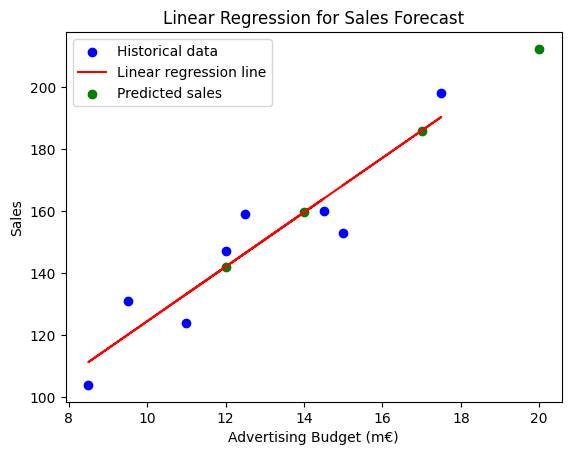

In [4]:
import matplotlib.pyplot as plt

# Plot the historical data
plt.scatter(advertising_budget, sales, color='blue', label='Historical data')

# Plot the linear regression line
plt.plot(advertising_budget, model.predict(advertising_budget), color='red', label='Linear regression line')

# Plot the future data points
plt.scatter(future_budget, predicted_sales, color='green', label='Predicted sales')

# Adding title and labels
plt.title('Linear Regression for Sales Forecast')
plt.xlabel('Advertising Budget (m€)')
plt.ylabel('Sales')
plt.legend()

# Show plot
plt.show()


# Moving Averages (of order n)

Historical data from past \( n \) time periods are used to forecast future activity

$$
F_t = \frac{D_{t-1} + D_{t-2} + D_{t-3} + \ldots + D_{t-n}}{n}
$$



Where:
- \( D_t \): Actual demand at time \( t \)
- \( F_t \): Forecast at time \( t \)


In [7]:
# Given demand data
demand_data = [45, 38, 29, 35, 31, 30]

# Calculate the moving averages of order 3
moving_averages = [np.nan] * 2  # The first two values are NA (not available)
moving_averages.extend(np.convolve(demand_data, np.ones(3)/3, mode='valid'))

# Create a DataFrame to hold the results
months = ['January', 'February', 'March', 'April', 'May', 'June']
df_moving_averages = pd.DataFrame({
    'Month': months,
    'Demand': demand_data,
    'Moving Average (n=3)': moving_averages
})

df_moving_averages


,Month,Demand,Moving Average (n=3)
0,January,45,NaN
1,February,38,NaN
2,March,29,37.333333
3,April,35,34.000000
4,May,31,31.666667
5,June,30,32.000000


# Weighted Moving Averages

---

Weighted moving average models apply

- Weighting to period data.
- Considers
- Some periods more important than others.

$$
F_t = w_{t-1}D_{t-1} + w_{t-2}D_{t-2} + w_{t-3}D_{t-3} + \ldots + w_{t-n}D_{t-n}
$$


In [8]:
# Given demand data and weights for the weighted moving average
demand_data = [45, 38, 29, 35, 31]
weights = np.array([0.25, 0.25, 0.5])

# Calculate the weighted moving averages of order 3, assuming the weights are in reverse chronological order
weighted_moving_averages = [np.nan, np.nan]  # The first two values are NA (not available)

# Compute the weighted moving averages
for i in range(2, len(demand_data)):
    weighted_avg = np.dot(demand_data[i-2:i+1], weights[::-1])  # Multiply the weights in reverse order
    weighted_moving_averages.append(weighted_avg)

# Append NA for June as we don't have demand data for this month
weighted_moving_averages.append(np.nan)

# Create a DataFrame to hold the results
months = ['January', 'February', 'March', 'April', 'May', 'June']
df_weighted_moving_averages = pd.DataFrame({
    'Month': months,
    'Demand': demand_data + [np.nan],  # Append NaN for June's demand
    'Weighted Moving Average (n=3)': weighted_moving_averages
})

df_weighted_moving_averages


,Month,Demand,Weighted Moving Average (n=3)
0,January,45.0,NaN
1,February,38.0,NaN
2,March,29.0,39.25
3,April,35.0,35.00
4,May,31.0,31.00
5,June,NaN,NaN


# Single Exponential Smoothing

---

- Models are developed using a single weighting or smoothing factor, named alpha (α)
- 0 < &alpha; < 1
- The mathematical model is:

$$
F_t = \alpha D_{t-1} + (1 - \alpha) F_{t-1}
$$

Where:

- \( F_t \) = Forecast at time \( t \)
- \( D_t \) = Actual demand at time \( t \)
- &alpha; = smoothing constant


In [9]:
# Given demand data, initial forecast, and smoothing constant alpha
demand_data = [45, 38, 29, 35, 31, 30]
initial_forecast = 37.33
alpha = 0.1

# Initialize the forecast list with the initial forecast
forecasts = [initial_forecast]

# Calculate the forecasts using exponential smoothing
for i in range(1, len(demand_data)):
    # Exponential smoothing formula: Ft = alpha * Dt-1 + (1 - alpha) * Ft-1
    new_forecast = alpha * demand_data[i-1] + (1 - alpha) * forecasts[-1]
    forecasts.append(new_forecast)

# Create a DataFrame to hold the results
months = ['January', 'February', 'March', 'April', 'May', 'June']
df_exponential_smoothing = pd.DataFrame({
    'Month': months,
    'Demand': demand_data,
    'Forecast': forecasts
})

df_exponential_smoothing


,Month,Demand,Forecast
0,January,45,37.330000
1,February,38,38.097000
2,March,29,38.087300
3,April,35,37.178570
4,May,31,36.960713
5,June,30,36.364642


# Exponential smoothing with Trend (Holt's Model)

Holt's Algorithm at any time period \( t \):

- Calculate the adjusted forecast at period $$\ t-1 $$ (initialisation):
  
$$\hat{F}_{t-1} = B_{t-1} + T_{t-1}$$


- Smooth the *base* forecast by taking into account the adjusted trend:
  
$$\ B_t = \alpha D_{t-1} + (1 - \alpha) (B_{t-1} + T_{t-1}) = \alpha D_{t-1} + (1 - \alpha) \hat{F}_{t-1} \$$

- Smooth the *trend*:
  
$$\ T_t = \beta (B_t - B_{t-1}) + (1 - \beta) T_{t-1} \$$

- Finally, calculate the adjusted forecast at period \( t \) or \( t + k \) as follows:
  
$$\ \hat{F}_t = B_t + T_t \$$
$$\ \hat{F}_{t+k} = B_t + (k + 1) \cdot T_t \$$


### General Example

In [10]:
import pandas as pd

# Transcribed data from the images provided by the user
data = {
    "Year": list(range(2006, 2026)),
    "Cars": [
        666.6, 533.8, 432, 612, 556, 792, 581.5, 611.3, 426, 559, 
        667.5, 554.3, 693, 763.9, 775.2, 640, 790, 840, 860, 890
    ],
    "Apartments": [
        145, 157.5, 167.5, 172.3, 197.8, 237.4, 316.5, 321.7, 350.9, 364, 
        366, 371.4, 413, 456.2, 473.8, 485, 510, 574.7, 610, 662.5
    ],
    "Sales": [
        165, 202, 201.5, 226, 216, 291.5, 298.3, 310.4, 256.8, 303.5, 
        314.5, 301.4, 328.5, 389.5, 438.7, 0, 0, 0, 0, 0  # Sales for 2021-2025 are not provided, set as 0
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# For the years 2021 to 2025, sales data is missing. We will need to forecast these values.
# The given model is: Forecast = 0.6068 * apartment constructions + 0.1553 * cars - 4.938

# Separate the data into known sales and years to forecast
known_sales_df = df[df['Year'] <= 2020]
forecast_years_df = df[df['Year'] >= 2021]

# Display the data to ensure it's been transcribed correctly
known_sales_df.tail()  # Show the last few entries of the known data


,Year,Cars,Apartments,Sales
10,2016,667.5,366.0,314.5
11,2017,554.3,371.4,301.4
12,2018,693.0,413.0,328.5
13,2019,763.9,456.2,389.5
14,2020,775.2,473.8,438.7


# Exponential Smoothing with Trend and Seasonality (Holt-Winters Model)

- Principle of the method: separate the *Base*, the *Trend* and the *Seasonality* and smooth them separately
- Three smoothing coefficients: $ \alpha $, $ \beta $, and $ \gamma $
- Equations:

$$ B_t = \alpha \frac{D_{t-1}}{S_{t-m}} + (1 - \alpha)(B_{t-1} + T_{t-1}) $$

$$ T_t = \beta (B_t - B_{t-1}) + (1 - \beta) T_{t-1} $$

$$ S_t = \gamma \frac{D_t}{B_t} + (1 - \gamma) S_{t-m} $$

- Adjusted Forecast at time period \( t + k \):

$$ \hat{F}_t = (B_t + T_t) S_{t-m} $$

$$ \hat{F}_{t+k} = [B_t + (k+1)T_t] S_{t+k-m} $$


## Holt-Winters Model Algorithm at time period \( t \)

- Algorithm at time period \( t \):
  - Initialization of the seasonality
    The seasonal coefficients in the first time periods (t=1..m) can be estimated as: the demand at \( t (D_t) \) divided by the average of the \( m \) first demands \( (\overline{D}) \):

    $$ S_t = \frac{D_t}{\overline{D}} \quad \text{for } t=1..m $$

  - Initialization of the trend \( (T_{t-1}) \) and the base \( (B_{t-1}) \)
  - Calculation of \( B_t \), \( T_t \), \( S_t \)
  - Calculation of the adjusted forecast at time period \( t \) is:

    $$ \hat{F}_t = (B_t + T_t)S_{t-m} $$


# Handling of seasonality: two approaches

- **Handling of seasonality**
  - Direct approach: explicit handling of the seasonality inside the extrapolation method
    - Holt Winters method = Triple exponential smoothing method handling trend and seasonality
  - Indirect approach: handling seasonality out of the extrapolation method
    - Use a 3 steps approach
      - Deseasonalize
      - Extrapolate
      - Re seasonalize


# Quantitative Methods: Advantages and drawbacks

### Advantages:
- They are quick to use if the model is already developed
- The data gathering does not require a high cost since the historical data are often stored in the information systems

### Drawbacks:
- They don't take into account the new effects:

> "Manage a company by only considering the time series methods in forecasting is like driving a car by only looking at the rearview mirror"

### For mid term and short term decisions, most companies use a forecasting approach that relies on quantitative methods (mainly extrapolation methods) adjusted by knowledge of marketing/sales

- Quantitative approaches
  - Extrapolation methods
  - Causal methods

\+

- Qualitative approaches
  - Expert judgment

⇒

- Marketing/Sales


# Qualitative Methods: Advantages & drawbacks

### Advantages:
- Take into account intangible factors.
- Used when there is little demand information (new product, new market, etc.)

### Drawbacks:
- Long delay of the process
- Bias/subjectivity
- High cost (ex. Experts consulting)
- Not enough precision


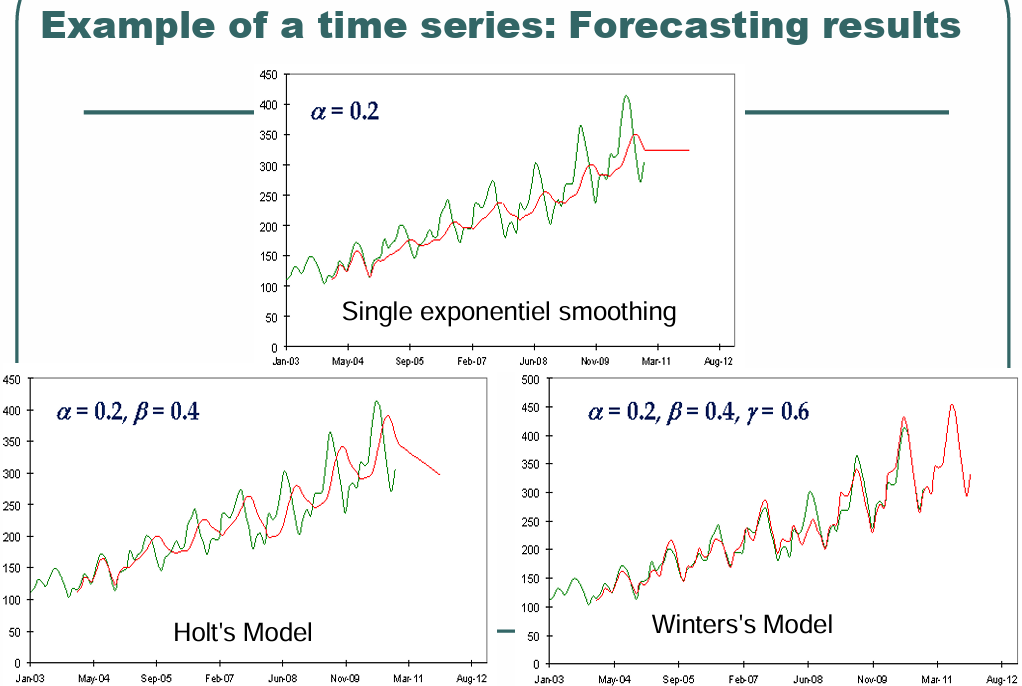

# Time series forecasting — ARIMA and SARIMA

In [6]:
from statsmodels.tsa.stattools import acf, pacf

acf_df = pd.DataFrame({column:acf(df.loc[:,column], nlags=36) 
                              for column in df.columns[1:]},)

NameError: name 'df' is not defined